In [25]:
import numpy as np
import pandas as pd

Simple Regression Neural Network

In [26]:
df = pd.read_csv("adm_pred.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [27]:
df.shape

(400, 9)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [29]:
# Remove Serial No.
df.drop(columns=['Serial No.'],inplace=True)

In [30]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [31]:
x = df.iloc[:, 0:-1]
y = df.iloc[:,-1]

In [32]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [33]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [35]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
39,307,108,2,4.0,3.5,7.70,0
167,313,102,3,2.0,3.0,8.27,0
383,300,100,3,3.0,3.5,8.26,0
221,316,110,3,3.5,4.0,8.56,0
351,325,110,4,3.5,4.0,8.67,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
X_train_scaled

array([[0.29787234, 0.57142857, 0.25      , ..., 0.57142857, 0.18382353,
        0.        ],
       [0.42553191, 0.35714286, 0.5       , ..., 0.42857143, 0.39338235,
        0.        ],
       [0.14893617, 0.28571429, 0.5       , ..., 0.57142857, 0.38970588,
        0.        ],
       ...,
       [0.68085106, 0.53571429, 0.5       , ..., 0.57142857, 0.70220588,
        1.        ],
       [0.70212766, 0.67857143, 1.        , ..., 0.71428571, 0.74632353,
        1.        ],
       [0.14893617, 0.46428571, 0.        , ..., 0.14285714, 0.22058824,
        0.        ]])

In [38]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [39]:
model = Sequential([
    Dense(7, activation='relu', input_dim=7),
    Dense(7, activation='relu'),
    Dense(1, activation='linear')
])

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(loss='mean_squared_error', optimizer='Adam')

In [42]:
history =  model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
7/7 [==============================] - 1s 20ms/step - loss: 0.6469 - val_loss: 0.6567
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5684 - val_loss: 0.5731
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5001 - val_loss: 0.5059
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 0.4412 - val_loss: 0.4454
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 0.3893 - val_loss: 0.3906
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.3413 - val_loss: 0.3406
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 0.2981 - val_loss: 0.2941
Epoch 8/100
7/7 [==============================] - 0s 8ms/step - loss: 0.2570 - val_loss: 0.2514
Epoch 9/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2197 - val_loss: 0.2119
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 0.1846 - val_loss: 0.1760
Epoch 11/100
7/7 [==========

In [43]:
y_pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [44]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7299889678979772

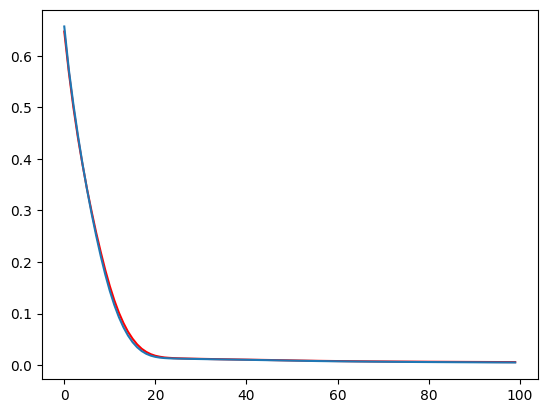

In [46]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'])